In [6]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Ubuntu',
        'size'   : 16}

matplotlib.rc('font', **font)


In [7]:
import pickle

pred_path = '../CTC_result/CTC_b_brightfield_0.pkl'
pred_path2 = '../CTC_result/CTC_fl_brightfield_0_clsweight=1.pkl'

pred_pkl = pickle.load(open(pred_path, 'rb'))
pred_pkl2 = pickle.load(open(pred_path2, 'rb'))

img_path = '../../detection/mmdetection/data/dataset/other_project/CTC/Images_1080/'
fl_path = '../../detection/mmdetection/data/dataset/other_project/CTC_final/fluorescence/'

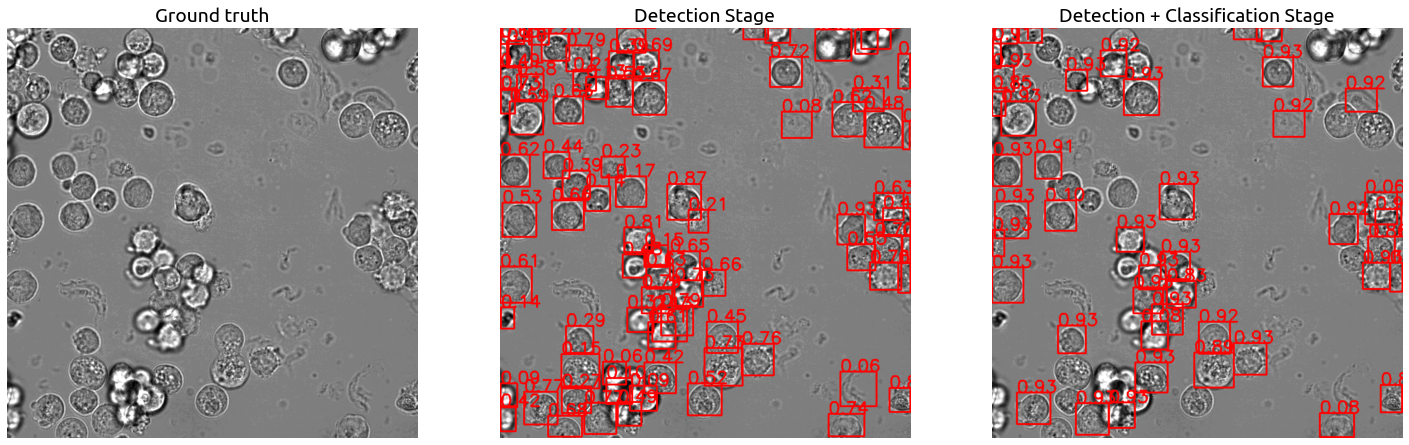

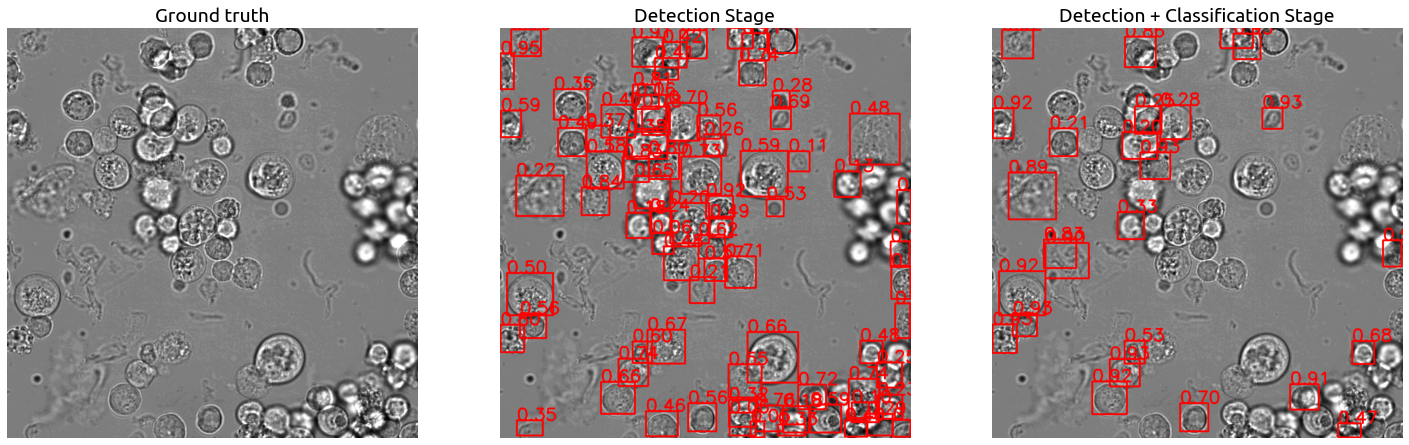

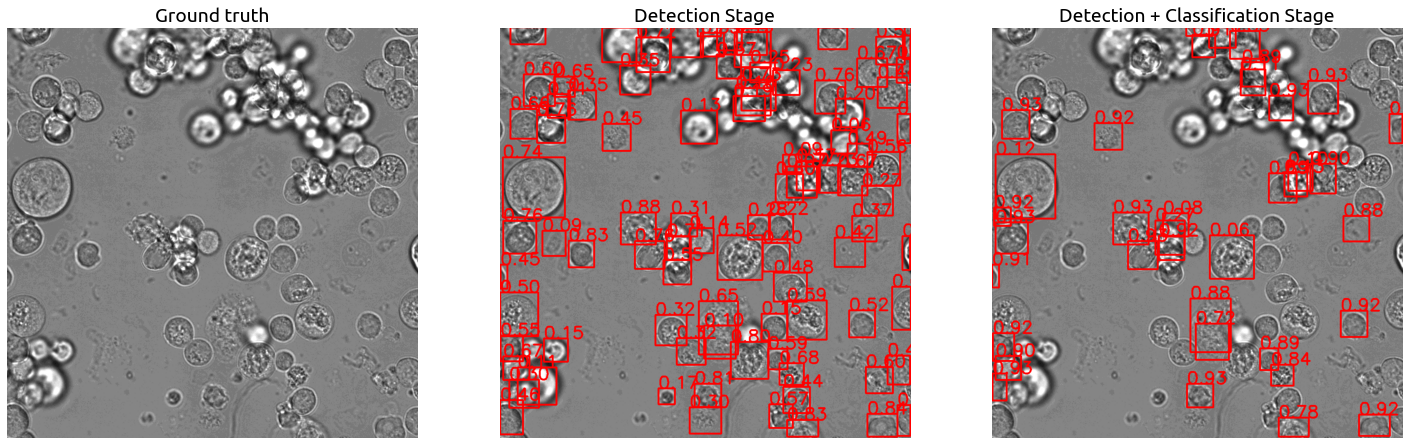

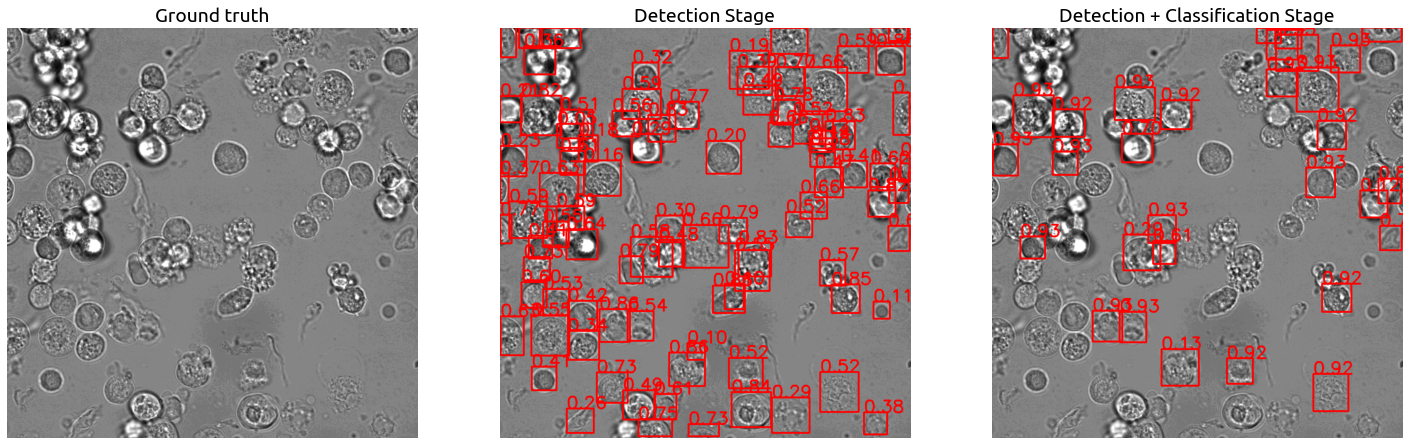

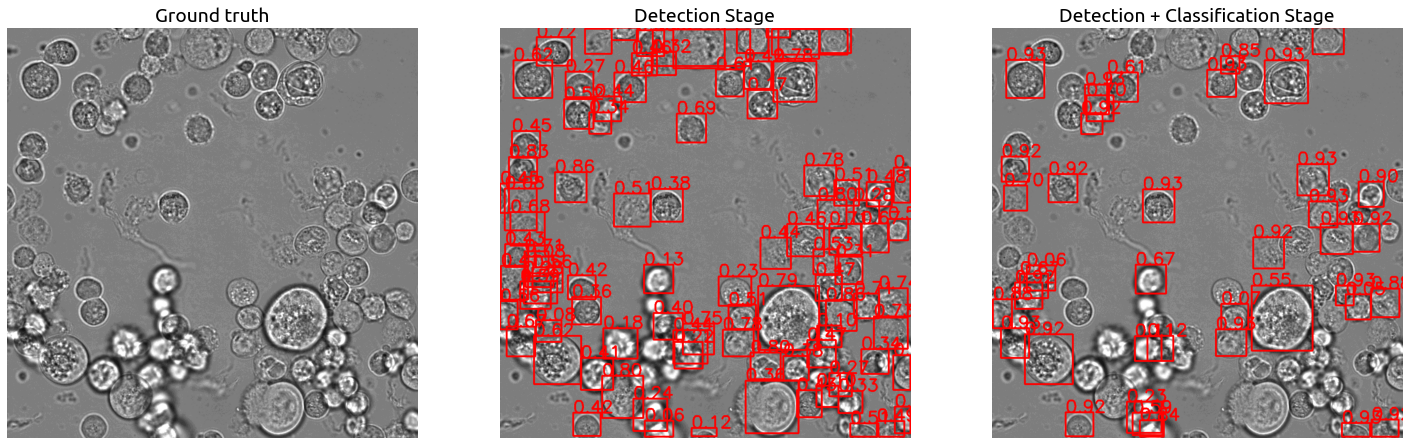

KeyboardInterrupt: 

In [8]:
thresh = 0.05

for i in pred_pkl:
    if(i == 'raw'):
        continue
    gt = pred_pkl[i]['gt']
    pred_det = pred_pkl[i]['pred']
    pred_cls = pred_pkl2[i]['pred']

    img = cv2.imread(img_path + i + '.png')
    img = np.array((img / img.max()) * 255, dtype = np.uint8) 
    img_det, img_cls, img_true = img.copy(), img.copy(), img.copy()
    
    
    for bbox_loc in gt:
        xmin, ymin, xmax, ymax = bbox_loc
        xmin, ymin, xmax, ymax = int(float(xmin)), int(float(ymin)), int(float(xmax)), int(float(ymax))
#         cv2.rectangle(img_true, (xmin, ymin), (xmax, ymax), (255, 0, 0), thickness = 3)
        
    for bbox_loc in pred_det:
        xmin, ymin, xmax, ymax, conf = bbox_loc
        conf, xmin, ymin, xmax, ymax = float(conf), int(float(xmin)), int(float(ymin)), int(float(xmax)), int(float(ymax))
        if(conf < thresh):
            continue
        cv2.rectangle(img_det, (xmin, ymin), (xmax, ymax), (255,0, 0), thickness = 3)
        cv2.putText(img_det, str(conf)[:4], (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0, 0), thickness = 4)

    for bbox_loc in pred_cls:
        xmin, ymin, xmax, ymax, conf = bbox_loc
        conf, xmin, ymin, xmax, ymax = float(conf), int(float(xmin)), int(float(ymin)), int(float(xmax)), int(float(ymax))
        if(conf < thresh):
            continue
        cv2.rectangle(img_cls, (xmin, ymin), (xmax, ymax), (255,0, 0), thickness = 3)
        cv2.putText(img_cls, str(conf)[:4], (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0, 0), thickness = 4)
    
    plt.figure(figsize = (25, 25))
    plt.subplot(131)
    plt.axis('off')
    plt.title('Ground truth')
    plt.imshow(img_true)
    plt.subplot(132)
    plt.axis('off')
    plt.title('Detection Stage')
    plt.imshow(img_det)
    plt.subplot(133)
    plt.axis('off')
    plt.title('Detection + Classification Stage')
    plt.imshow(img_cls)
    plt.show()

